In [9]:
import DataAnalysis as da
import csv
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import pandas as pd
from uncertainties import ufloat
%matplotlib inline

# Functions

In [10]:
def non_ohmic(V, V_0, a, b, c):
    V = V - V_0
    
    if V < 0:
        return 0
    elif V > c:
        slope = 2*a*c + b
        x_point = c
        y_point = a*c**2 + b*c
        return slope*(V-x_point) + y_point
    return a*V**2 + b*V

def non_ohmic_list(V, V_0, a, b, c):
    return [non_ohmic(volt, V_0, a, b, c) for volt in V]


def stoping_voltage(V_0, a, b, c):
    # y-y_1 = slope(x-x_1)
    # 0-y_1/slope = x - (c+V_0)
    x = c
    y = a*x**2 + b*x
    slope = (2*a*c + b)
    return -y/slope + x + V_0

def stoping_voltage(V_0, a, b, c):
    # y-y_1 = slope(x-x_1)
    # 0-y_1/slope = x - (c+V_0)
    x = c
    y = a*x**2 + b*x
    slope = (2*a*c + b)
    return -y/slope + x + V_0

def linear_fit(x, a, b, c, V_0):
    V = np.array(x) - V_0
    slope = 2*a*c + b
    x_point = c
    y_point = a*c**2 + b*c
    return slope*(V-x_point) + y_point

def freq_func(wavelength): 
    return 3e8/wavelength

def freq_error(wavelength, error):
    return 3e8/wavelength**2*error

In [18]:
def stop_voltage_plot(Voltage, Current, name, estimate_v_0=-649, estimate_c=700):
    p, cov = opt.curve_fit(non_ohmic_list, Voltage, Current, [estimate_v_0, 1, 1, estimate_c])
    p_err = np.sqrt(np.diag(cov))
    V_0, a, b, c= [ufloat(val, error) for val, error in zip(p, p_err)]
    #c = c if c<estimate_c+500 else estimate_c+500

    volt_stop_w_err = -stoping_voltage(V_0, a, b, c)
    print(f"The Stopping Voltage is : {volt_stop_w_err}")
    volt_stop = volt_stop_w_err.nominal_value
    #print(f"The fitted parameters are: {p}")
    print(f"The Stopping Voltage is : {volt_stop}")
    fig, ax = plt.subplots(1, 2, figsize=(16,5))
    ax[0].axhline(color="black")    
    ax[0].text(min(Voltage), np.mean(Current)*1.5, f"a = {a:.2e}, b = {b:.2e}")
    ax[0].text(min(Voltage), np.mean(Current)*1.35, f"c = {c:.2e}, v_0 = {V_0:.2e}")
    ax[0].errorbar(Voltage, Current, label="Raw Data", fmt="o", yerr = 5, xerr=5,  capsize=2,elinewidth=1, markeredgewidth=2)
    ax[0].plot(np.sort(Voltage), non_ohmic_list(np.sort(Voltage), V_0, a, b, c), label="Fitted Curve")
    volt_spaced = list(range(int(min(Voltage)), 500, 200))
    ax[0].errorbar(np.sort(volt_spaced), linear_fit(np.sort(volt_spaced),a, b, c, V_0), label="Linear Asymptpte", yerr = 5*np.sqrt(len(Voltage)), xerr=5*np.sqrt(len(Voltage)),  capsize=2,elinewidth=1, markeredgewidth=2)
    ax[0].set_ylim((-max(Current)*.02, max(Current)*1.05))
    ax[0].errorbar(-volt_stop, 0, xerr=5*np.sqrt(len(Voltage))*np.sqrt(2),  capsize=2,elinewidth=1, markeredgewidth=2, color='red', zorder=6, label="Stopping Voltage")
    print(5*np.sqrt(len(Voltage))*np.sqrt(2))
    ax[0].set_xlabel("Voltage (mV)")
    ax[0].set_ylabel("Photocurrent (nA)")
    ax[0].set_title("Voltage vs Photocurrent")
    
    ax[1].errorbar(Voltage, np.subtract(non_ohmic_list(Voltage, V_0, a, b, c), Current), label = "Residuals", fmt="o", yerr = 5, xerr=5,  capsize=2,elinewidth=1)
    ax[1].axhline(0, label = "Reference Line")
    ax[1].set_xlabel("Voltage (mV)")
    ax[1].set_ylabel("Residual (y_pred - y_act)")
    ax[1].set_title("Residual")    
    ax[0].legend()
    ax[1].legend()
    fig.suptitle(name)
    plt.show()
    return ufloat(volt_stop, 0)

In [12]:
def func(v_stop, v_stop_err, wavelength, wavelength_err, name):
    kin = [v*1e-3 for v in v_stop]
    kin_err = [v*1e-3 for v in v_stop_err]
    freq = list(map(freq_func, wavelength))
    freq_err  = [freq_err(wavelength, wavelength_error)]
    
    error = np.sqrt(np.add(np.square(np.multiply(m_simple, v_stop_err)), np.square)
    p, v = kin, freq, 1, cov=True)
    
    
    #print(f"The fitted parameters are: {p}")
    print(f"The Stopping Voltage is : {volt_stop}")
    fig, ax = plt.subplots(1, 2, figsize=(16,5))
    ax[0].axhline(color="black")    
    ax[0].text(min(Voltage), np.mean(Current)*1.5, f"a = {a:.2e}, b = {b:.2e}")
    ax[0].text(min(Voltage), np.mean(Current)*1.35, f"c = {c:.2e}, v_0 = {V_0:.2e}")
    ax[0].errorbar(Voltage, Current, label="Raw Data", fmt="o", yerr = 5, xerr=5,  capsize=2,elinewidth=1, markeredgewidth=2)
    ax[0].plot(np.sort(Voltage), non_ohmic_list(np.sort(Voltage), V_0, a, b, c), label="Fitted Curve")
    volt_spaced = list(range(int(min(Voltage)), 500, 200))
    #ax[0].errorbar(np.sort(volt_spaced), linear_fit(np.sort(volt_spaced),a, b, c, V_0), label="Linear Asymptpte", yerr = 5*np.sqrt(len(Voltage)), xerr=5*np.sqrt(len(Voltage)),  capsize=2,elinewidth=1, markeredgewidth=2)
    ax[0].set_ylim((-max(Current)*.02, max(Current)*1.05))
    ax[0].errorbar(-volt_stop, 0, xerr=5*np.sqrt(len(Voltage))*np.sqrt(2),  capsize=2,elinewidth=1, markeredgewidth=2, color='red', zorder=6, label="Stopping Voltage")
    print(5*np.sqrt(len(Voltage))*np.sqrt(2))
    ax[0].set_xlabel("Voltage (mV)")
    ax[0].set_ylabel("Photocurrent (nA)")
    ax[0].set_title("Voltage vs Photocurrent")
    
    ax[1].errorbar(Voltage, np.subtract(non_ohmic_list(Voltage, V_0, a, b, c), Current), label = "Residuals", fmt="o", yerr = 5, xerr=5,  capsize=2,elinewidth=1)
    ax[1].axhline(0, label = "Reference Line")
    ax[1].set_xlabel("Voltage (mV)")
    ax[1].set_ylabel("Residual (y_pred - y_act)")
    ax[1].set_title("Residual")    
    ax[0].legend()
    ax[1].legend()
    fig.suptitle(name)
    plt.show()
    return volt_stop

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3355450691.py, line 7)

In [13]:
def open_file_and_return_data(file_name):
    """
    This function will open the Oscilliscope data with the least amount of memory possible to prevent crashing by
    openning and closing the file while only saving the values of the ch1, ch2 and time markers
    These data lists are then returned for data processing and analysis.
    """
    wavelength, voltage, current  = [],[],[]
    
    # opening the CSV file
    with open(file_name, mode ='r') as file:
       # reading the CSV file
        csvFile = csv.reader(file)
        
        headers = next(csvFile)
        assert headers[0] == 'Wavelength (nm)'
        
        wavelength_index = headers.index("Wavelength (nm)")
        voltage_index = headers.index("Voltage (mV)")
        current_index = headers.index("Current (uA)")
        
        # saving the contents of the CSV file
        for lines in csvFile:
            try:
                if (len(wavelength) > 1):
                    wavelength.append(float(lines[wavelength_index]))
                voltage.append(float(lines[voltage_index]))
                current.append(float(lines[current_index]))    
            except IndexError:
                break
    return wavelength, voltage, current

# Import Data

In [14]:
data1_files = [ "Data/"+file for file in os.listdir("Data") if file.endswith(".csv")]
print(f"Method 1: {data1_files}")

Method 1: ['Data/Sample.csv']


In [15]:
data = [open_file_and_return_data(file) for file in data1_files]
initial_params = [[-649, 700]]

The Stopping Voltage is : (0.0+/-1.1)e+04
The Stopping Voltage is : 332.3772143822286


TypeError: can't convert an affine function (<class 'uncertainties.core.AffineScalarFunc'>) to float; use x.nominal_value

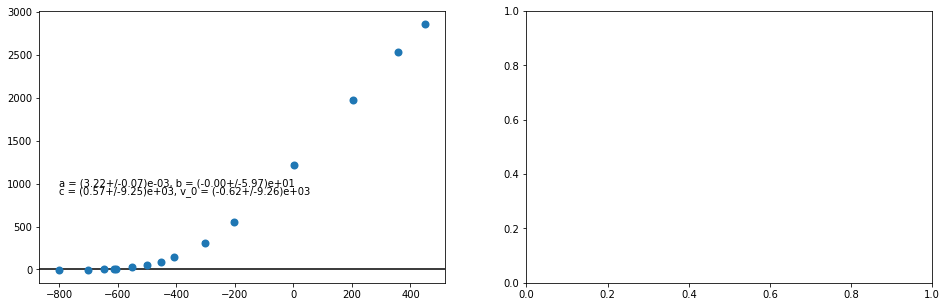

In [19]:
stop_volt = [stop_voltage_plot(data[i][1], data[i][2], f"Photoelectric Effect with λ = {data[i][0]} nm",
                               initial_params[i][0], initial_params[i][1]) for i in range(len(data))]

In [17]:
ufloat(float(1.1), 0)

1.1+/-0